## Data visualization with ggplot2

Once you've cleaned and summarized data, you'll want to visualize them to understand trends and extract insights. Here you'll use the ggplot2 package to explore trends in United Nations voting within each country over time.

### Plotting a line over time
In the last chapter, you learned how to summarize() the votes dataset by year, particularly the percentage of votes in each year that were "yes".

You'll now use the ggplot2 package to turn your results into a visualization of the percentage of "yes" votes over time.

Warning message:
"Problem with `mutate()` input `country`.
i Some values were not matched unambiguously: 260

i Input `country` is `countrycode(ccode, "cown", "country.name")`."Warning message in countrycode(ccode, "cown", "country.name"):
"Some values were not matched unambiguously: 260
"`summarise()` ungrouping output (override with `.groups` argument)


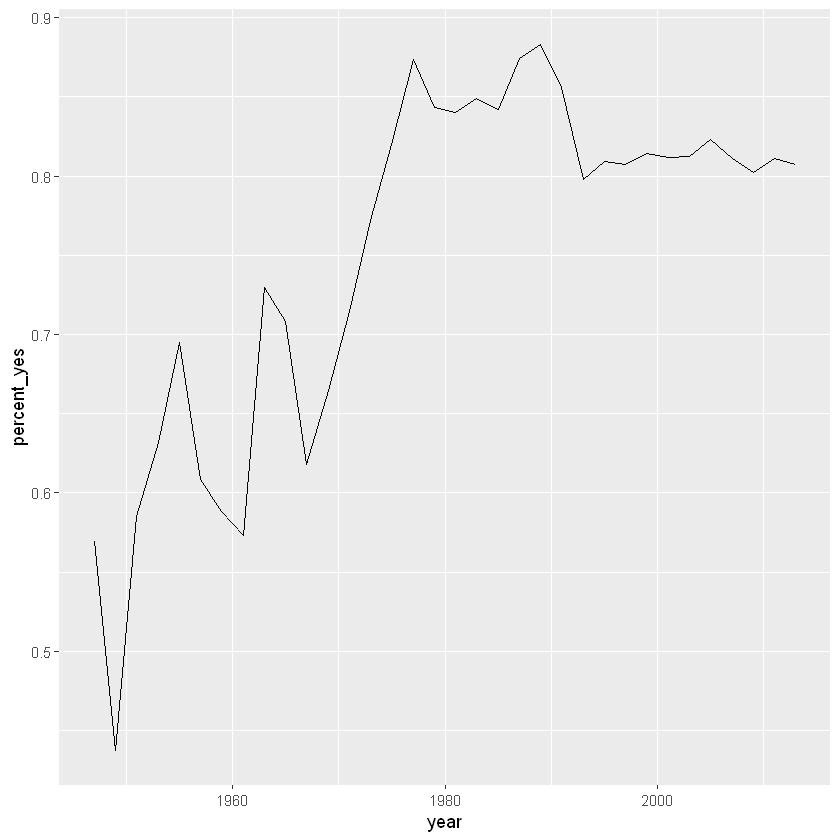

In [3]:
# read data
votes = readRDS("votes.rds")

# Load the dplyr package
library(dplyr)
library(countrycode)

# votes processed
votes_processed <- votes %>%
  filter(vote <= 3) %>%
  mutate(year = session + 1945) %>%
  mutate(country = countrycode(ccode, "cown", "country.name"))

# Summarize by country: by_country
by_year = votes_processed %>%
  group_by(year) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

# Load the ggplot2 package
library(ggplot2)

# Create line plot
ggplot(by_year, aes(x = year, y = percent_yes)) + geom_line()

### Other ggplot2 layers
A line plot is one way to display this data. You could also choose to display it as a scatter plot, with each year represented as a single point. This requires changing the layer (i.e. geom_line() to geom_point()).

You can also add additional layers to your graph, such as a smoothing curve with geom_smooth().

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


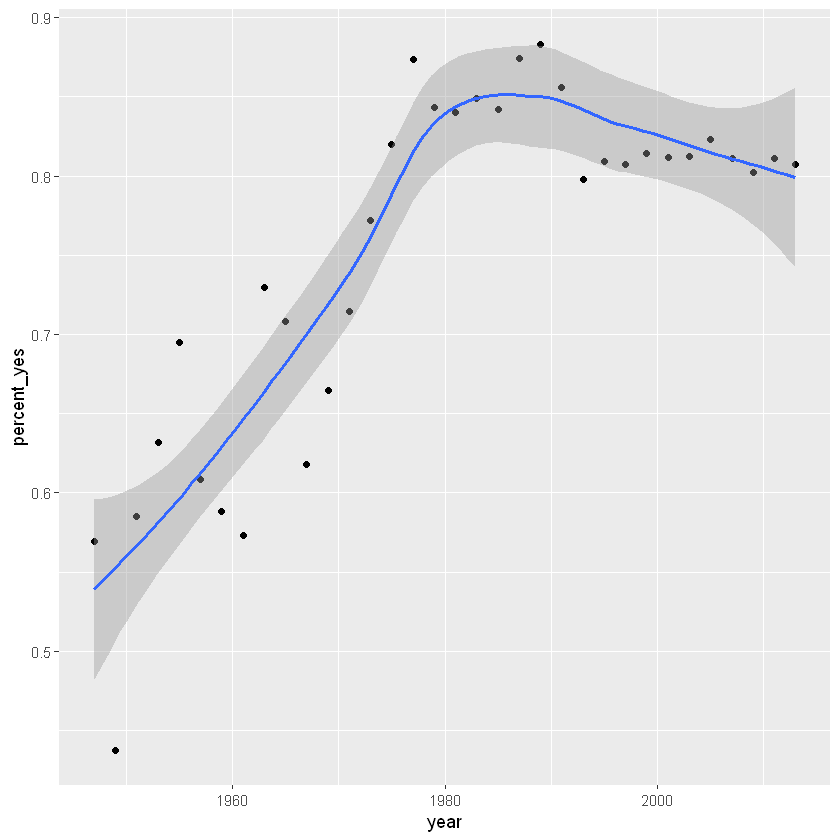

In [5]:
# Change to scatter plot and add smoothing curve
ggplot(by_year, aes(year, percent_yes)) +
  geom_point() + geom_smooth()

### Summarizing by year and country
You're more interested in trends of voting within specific countries than you are in the overall trend. So instead of summarizing just by year, summarize by both year and country, constructing a dataset that shows what fraction of the time each country votes "yes" in each year.

In [7]:
# Group by year and country: by_year_country
by_year_country <- votes_processed %>%
  group_by(year, country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

`summarise()` regrouping output by 'year' (override with `.groups` argument)


### Plotting just the UK over time
Now that you have the percentage of time that each country voted "yes" within each year, you can plot the trend for a particular country. In this case, you'll look at the trend for just the United Kingdom.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


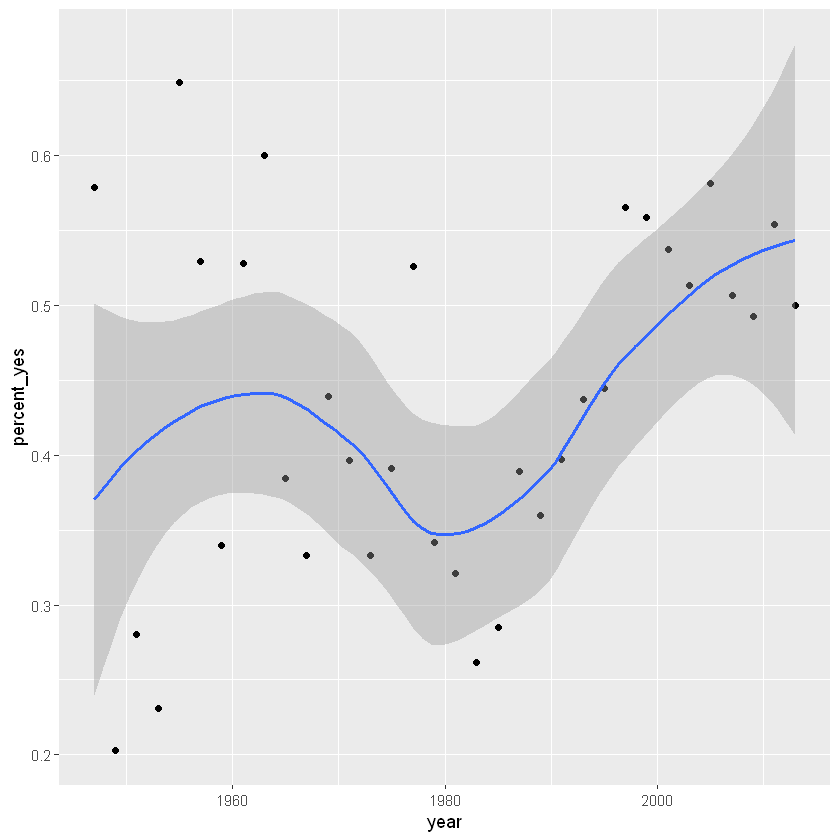

In [9]:
# Create a filtered version: UK_by_year
UK_by_year <- by_year_country %>%
  filter(country == "United Kingdom")

# Line plot of percent_yes over time for UK only
ggplot(UK_by_year, aes(x = year, y = percent_yes)) + geom_point() + geom_smooth()

### Plotting multiple countries
Plotting just one country at a time is interesting, but you really want to compare trends between countries. For example, suppose you want to compare voting trends for the United States, the UK, France, and India.

You'll have to filter to include all four of these countries and use another aesthetic (not just x- and y-axes) to distinguish the countries on the resulting visualization. Instead, you'll use the color aesthetic to represent different countries.

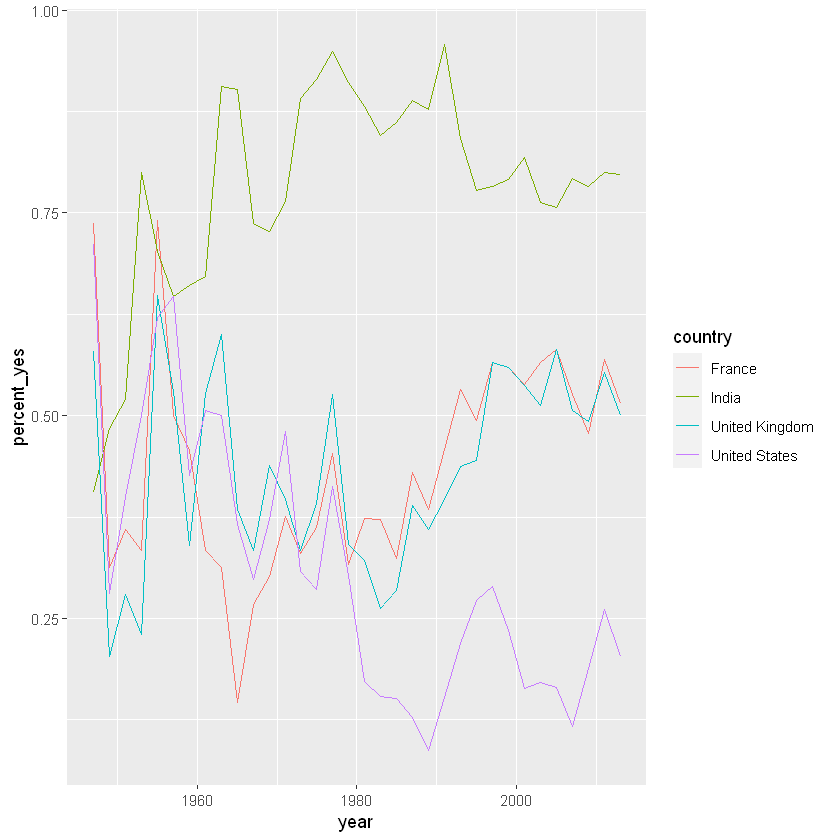

In [13]:
# Vector of four countries to examine
countries <- c("United States", "United Kingdom",
               "France", "India")

# Filter by_year_country: filtered_4_countries
filtered_4_countries <- by_year_country %>%
  filter(country %in% countries)

# Line plot of % yes in four countries
ggplot(filtered_4_countries, aes(x = year, y = percent_yes, color = country)) + geom_line()

### Faceting the time series
Now you'll take a look at six countries. While in the previous exercise you used color to represent distinct countries, this gets a little too crowded with six.

Instead, you will facet, giving each country its own sub-plot. To do so, you add a facet_wrap() step after all of your layers.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


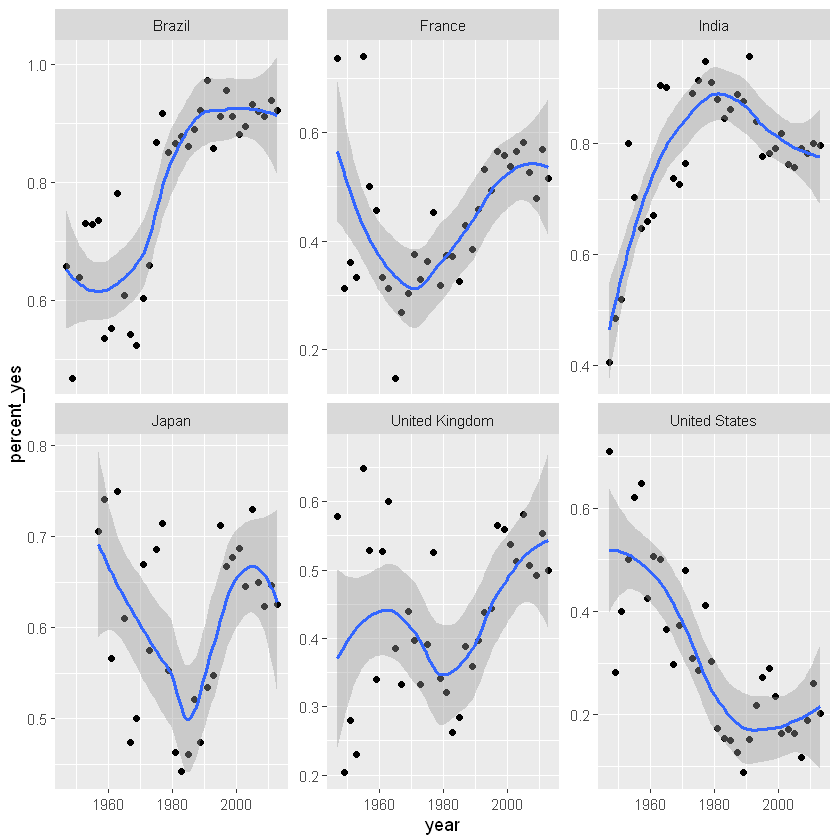

In [15]:
# Vector of six countries to examine
countries <- c("United States", "United Kingdom",
               "France", "Japan", "Brazil", "India")

# Filtered by_year_country: filtered_6_countries
filtered_6_countries <- by_year_country %>%
  filter(country %in% countries)

# Line plot of % yes over time faceted by country
ggplot(filtered_6_countries, aes(x = year, y = percent_yes)) + geom_point() + geom_smooth() + facet_wrap(~ country, scales = "free_y")

### Choose your own countries
The purpose of an exploratory data analysis is to ask questions and answer them with data. Now it's your turn to ask the questions.

You'll choose some countries whose history you are interested in and add them to the graph. If you want to look up the full list of countries, enter by_country$country in the console.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


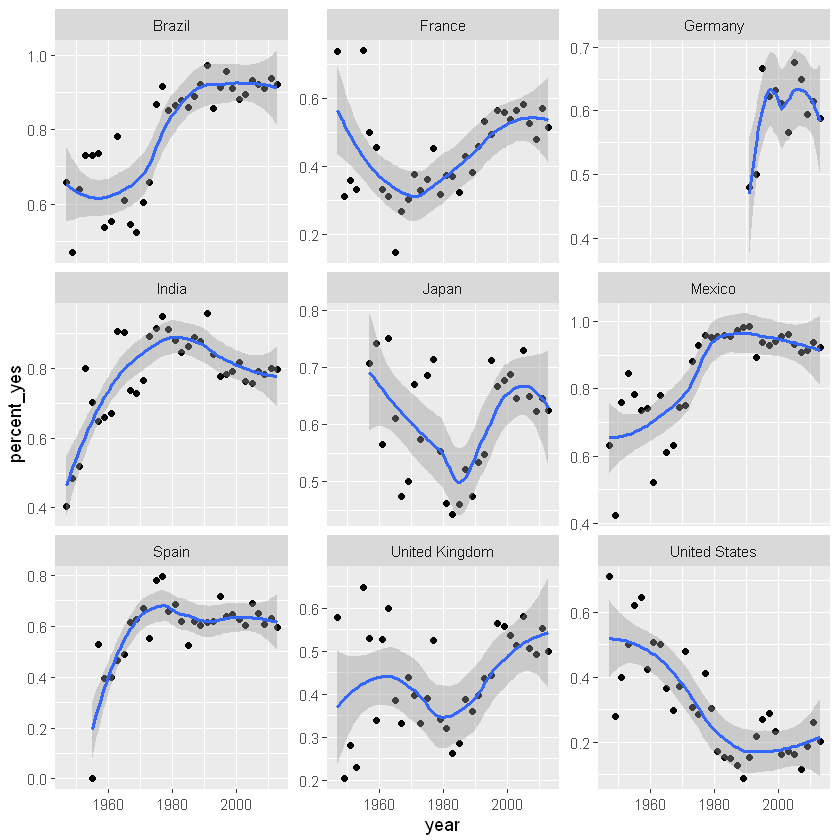

In [16]:
# Add three more countries to this list
countries <- c("United States", "United Kingdom",
               "France", "Japan", "Brazil", "India", 
               "Spain", "Germany", "Mexico")

# Filtered by_year_country: filtered_countries
filtered_countries <- by_year_country %>%
  filter(country %in% countries)

# Line plot of % yes over time faceted by country
ggplot(filtered_countries, aes(year, percent_yes)) + geom_point() + geom_smooth() + facet_wrap(~ country, scales = "free_y")